## Mathematical Optimization Series

# Part 3: Random search

In this post we describe our first algorithm - random search.  Random search is simple algorithm that works to find the global minimum of a function by - at each step - randomly sampling many directions, evaluating the function at each such sample, and choosing the one that decreases the function value the most.  

In [107]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np
from matplotlib import gridspec
import math
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


What we can introduce here

- the notion of a step length, both fixed and diminishing (not sure about adjustable here, besides thats a more advanced topic than I imagine covering at the start of the text)


- the notion of moving towards a minimum in the input plane, 1-d and 2-d input examples


- the notion of visualizing higher dimensional paths via cost function decrease


- the notion of random movements being helpful in overcoming saddle point


- the notion of local search

# RANDOM EVALUATION

## Experiment 1: low dimension - grid and random eval

Perfectly fine for low dimension - here we illustrate with one dimensional input.

<IPython.core.display.Javascript object>


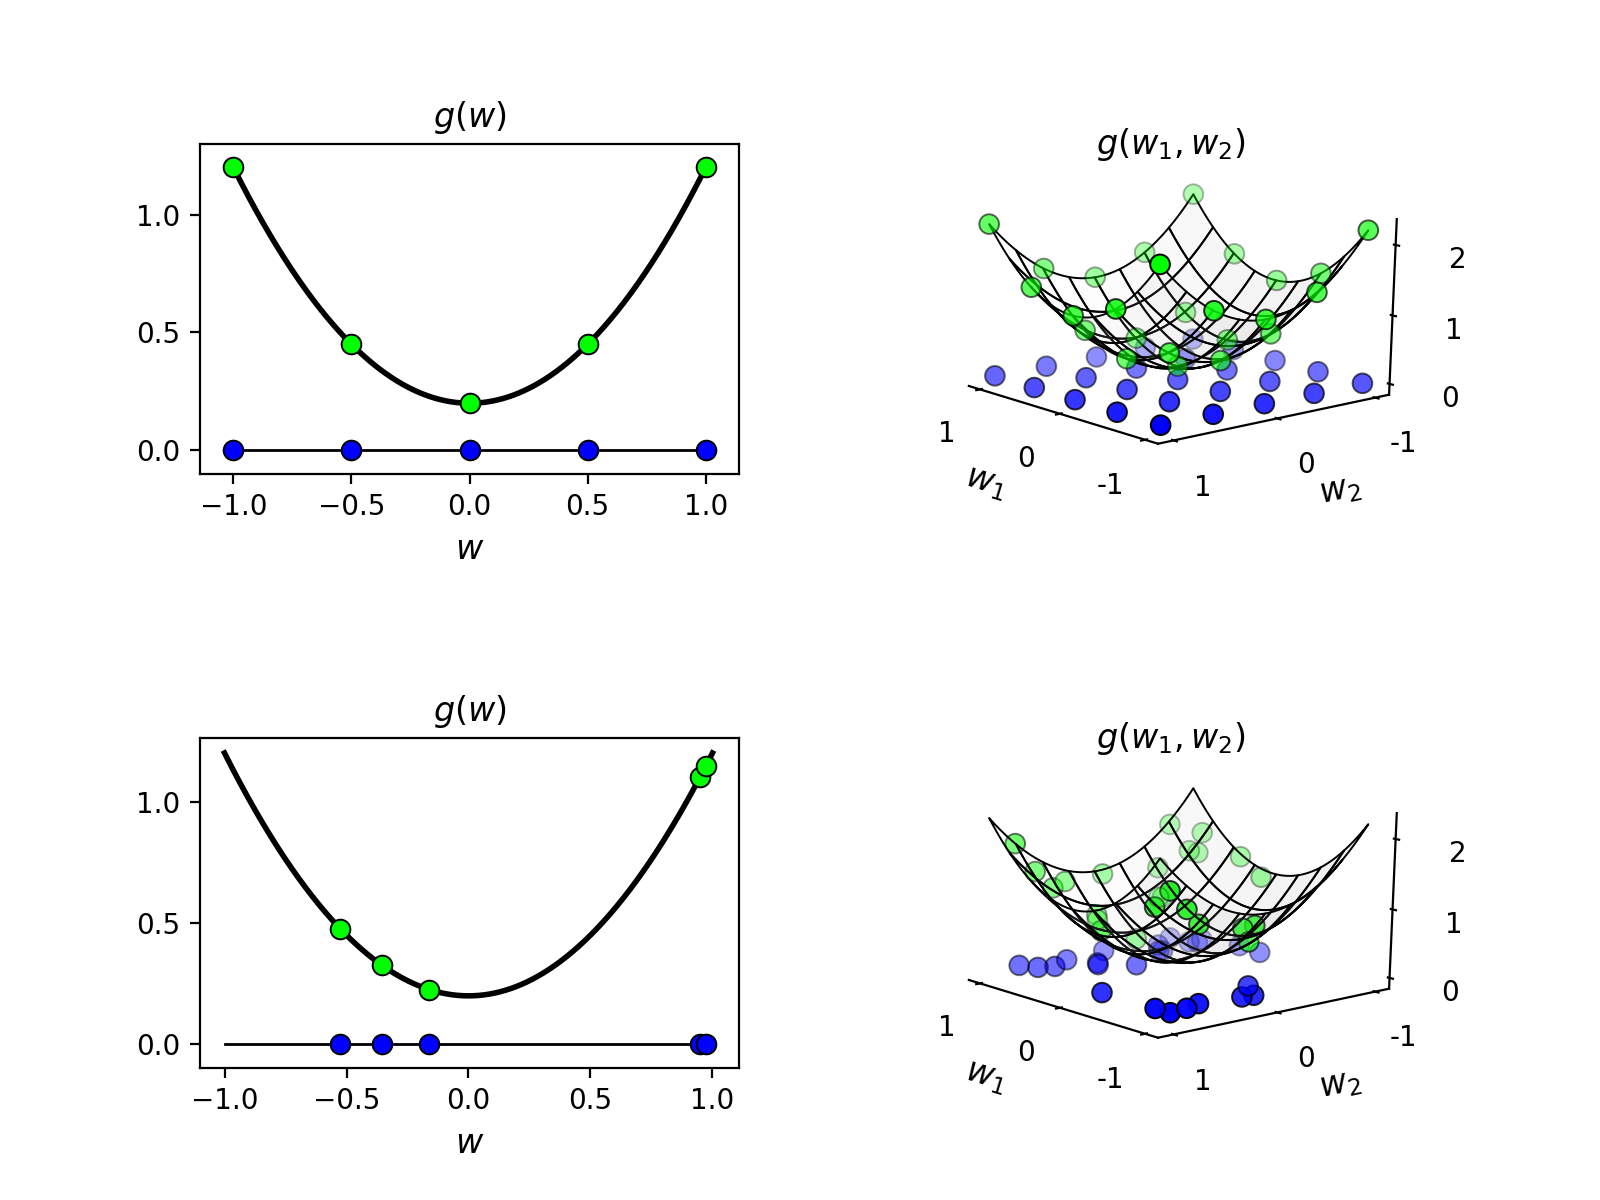

In [131]:
# define function
func = lambda w: np.dot(w.T,w) + 0.2
num_samples = 5
view = [20,140]

# plot 2d and 3d version, with even grid and randomly selected points
optlib.random_visualization.double_plot(func,num_samples,view = view)

## Experiment: Simple quadratic, as we raise in dimension and evaluate

Take 1000 samples from dimension = 1 to 100 just for show, evaluate in a corresponding simple symmetric quadratic function.  Plot the mean and std evaluation at each dimension.  Of course it increases - and we can even calculate the average evaluation as dimension increases.  Which we do - likely for a footnote calculation - after the experiment.

In [45]:
# define symmetric quadratic N-dimensional
g = lambda w: np.dot(w.T,w)

In [110]:
# loop over dimensions, sample points, evaluate
mean_evals = []
big_dim = 100
num_pts = 10000
pt_stops = [100,1000,10000]
for dim in range(big_dim):
    dim_eval = []
    m_eval = []
    for pt in range(num_pts):
        # generate random point using uniform
        r = 2*np.random.rand(dim+1) - 1
        e = g(r)
        dim_eval.append(e)
        
        # record mean and std of so many pts
        if (pt+1) in pt_stops:
            m_eval.append(np.min(dim_eval))
    mean_evals.append(m_eval)

# convert to array for easy access
mean_evals_global = np.asarray(mean_evals)

<IPython.core.display.Javascript object>


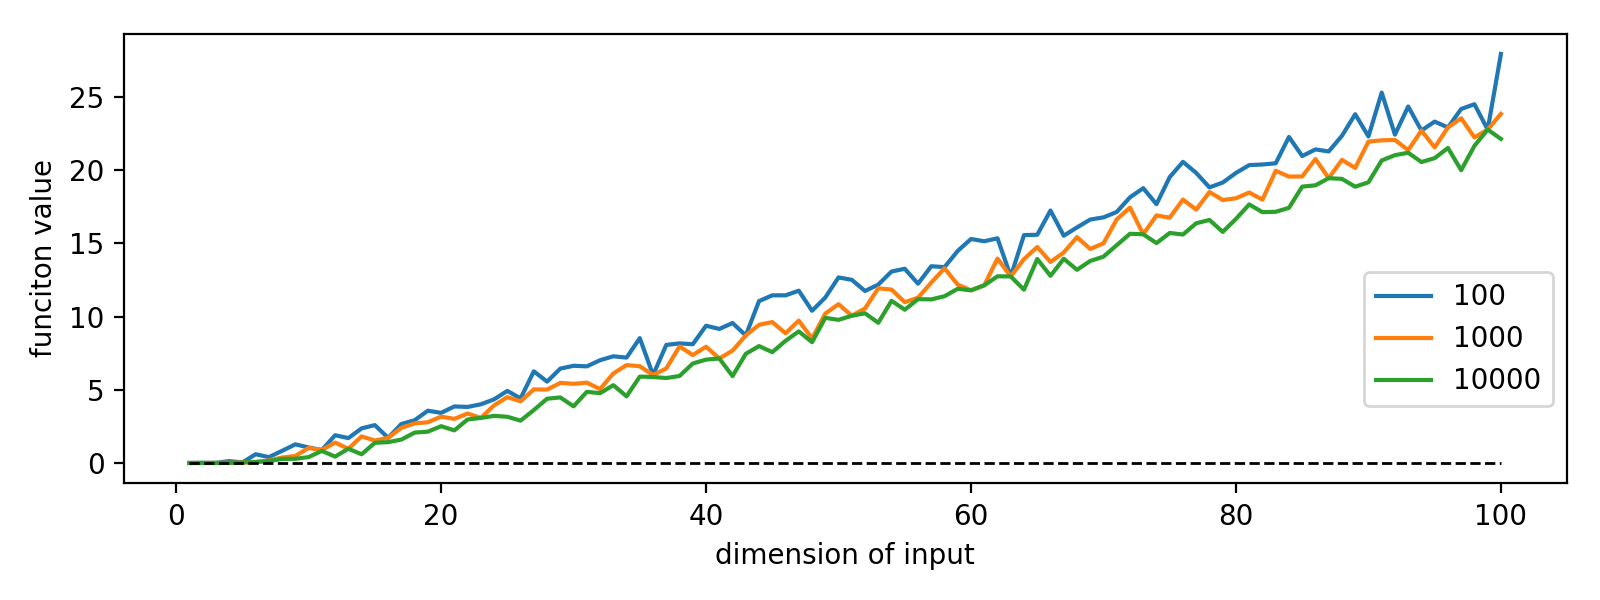

In [111]:
fig = plt.figure(figsize = (8,3))

# create subplot with 3 panels, plot input function in center plot
gs = gridspec.GridSpec(1, 1, width_ratios=[1]) 
fig.subplots_adjust(wspace=0.5,hspace=0.01)

# plot input function
ax = plt.subplot(gs[0])
     
for k in range(len(pt_stops)):
    mean_evals = mean_evals_global[:,k]
    
    # scatter plot mean value
    ax.plot(np.arange(big_dim)+1,mean_evals)

    # clean up plot - label axes, etc.,
    ax.set_xlabel('dimension of input')
    ax.set_ylabel('funciton value')

# draw legend
t = [str(p) for p in pt_stops]
ax.legend(t, bbox_to_anchor=(1, 0.5))

# draw horizontal axis
ax.plot(np.arange(big_dim) + 1,np.arange(big_dim)*0,linewidth=1,linestyle='--',color = 'k')

plt.show()

Each axis of input is sampled according to a uniform distrbiution on the interval $[-1,1]$.  Thus the *average value along each input dimension* is equal to 0 (as the average of a uniform on the inverval $[a,b]$ is given as $\frac{1}{2}(a+b)$).

The problem is that the probability that all input elements are small in magnitude (close to zero or equal to zero) *simultaneously* gets exponentially smaller as we go up in dimension.  For example

- in one dimension, the probability of selecting something on the interval $[-0.1,0.1]$ is - by definition - $p(v \leq |0.1|) = \frac{0.2}{2} = 0.1$.  Since each dimension is drawn independently, this means that in $D$ dimensions the probability of drawing each element $v_i$ so that $v_i \leq | 0.1 | $ is $p(v_i \leq |0.1|,\,\, i = 1,...,D) = (0.1)^D$. 

Thus as our dimension increases the probability of randomly accessing points close to the true global minimum at the origin rapidly diminishes - it diminishes exponentially.  In order to keep up with this our sampling would have to increase exponentially with dimension as well - which is computationally infeasible.

# RANDOM LOCAL SEARCH

In [112]:
# loop over dimensions, sample points, evaluate
mean_evals = []
big_dim = 25
num_pts = 10000
pt_stops = [100,1000,10000]
for dim in range(big_dim):
    # containers for evaluation
    dim_eval = []
    m_eval = []
    
    # starting vector
    start = np.zeros((dim+1,1))
    start[0] = 1

    for pt in range(num_pts):
        # generate random point on n-sphere
        r = np.random.randn(dim+1)
        r.shape = (len(r),1)
        pt_norm = math.sqrt(np.dot(r.T,r))
        r = [b/pt_norm for b in r]
        r+=start
        
        # compare new direction to original point
        if g(r) < g(start):
            dim_eval.append(1)
        else:
            dim_eval.append(0)
    
        # record mean and std of so many pts
        if (pt+1) in pt_stops:
            m_eval.append(np.mean(dim_eval))
            
    # store average number of descent directions
    mean_evals.append(m_eval)

# convert to array for easy access
mean_evals_global = np.asarray(mean_evals)

<IPython.core.display.Javascript object>


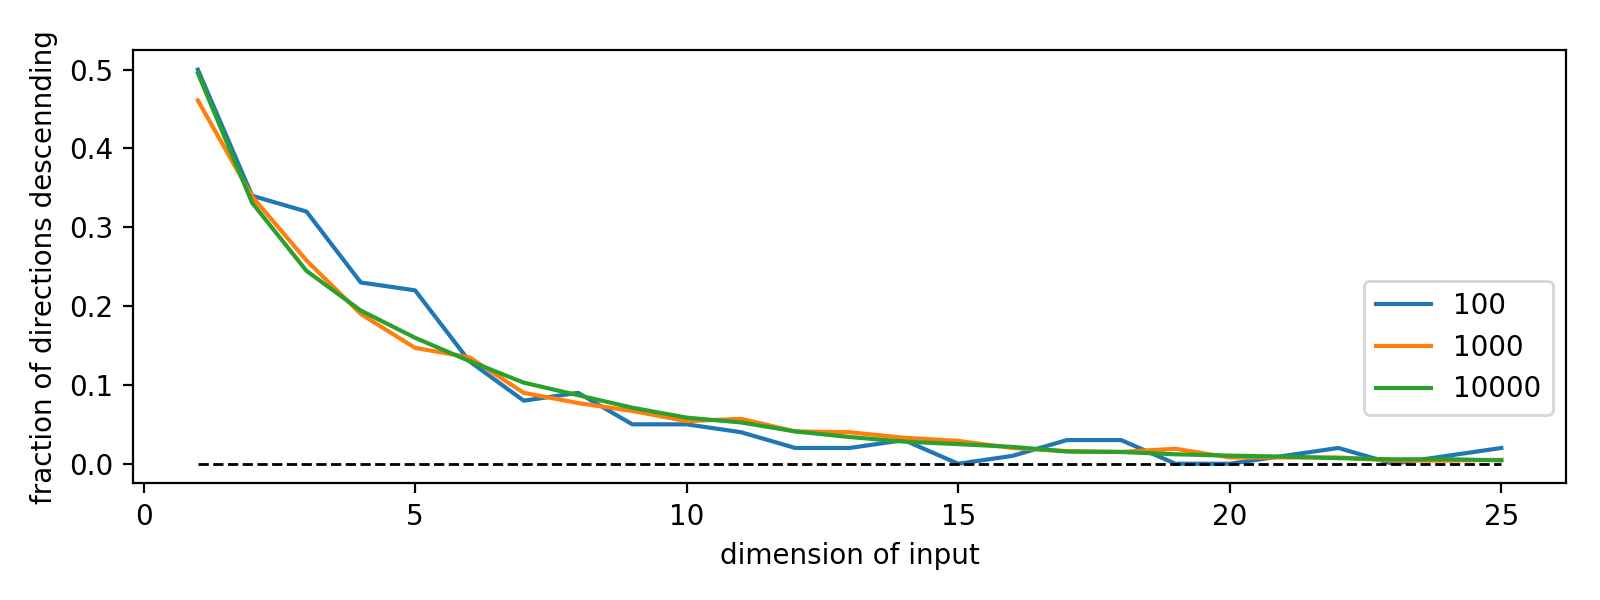

In [114]:
fig = plt.figure(figsize = (8,3))

# create subplot with 3 panels, plot input function in center plot
gs = gridspec.GridSpec(1, 1, width_ratios=[1]) 
fig.subplots_adjust(wspace=0.5,hspace=0.01)

# plot input function
ax = plt.subplot(gs[0])
     
for k in range(len(pt_stops)):
    mean_evals = mean_evals_global[:,k]
    
    # scatter plot mean value
    ax.plot(np.arange(big_dim)+1,mean_evals)

    # clean up plot - label axes, etc.,
    ax.set_xlabel('dimension of input')
    ax.set_ylabel('fraction of directions descennding')

# draw legend
t = [str(p) for p in pt_stops]
ax.legend(t, bbox_to_anchor=(1, 0.5))

# draw horizontal axis
ax.plot(np.arange(big_dim) + 1,np.arange(big_dim)*0,linewidth=1,linestyle='--',color = 'k')

plt.show()

# Summary

While it is a good first algorithm to discuss due to its ease of implementation and minimal use of the cost function - we need only be able to evaluate the function itself - random search is typically ineffective for modern machine learning applications.  

This is first off because the cost functions we deal with in machine learning have known algebraic forms, thus allowing us to leverage their derivatives to quickly and effeciently determine directions that decrease function value (i.e., we need not search around randomly for directions that do this).  We will see this with the other algorithms we discuss - gradient descent and Newton's method - in significant detail.  Moreover many modern machine learning cost functions have input dimension $N$  on the order of thousands - to hundreds of millions.  In such contexts randomly seeking out direction that substantially decreases a function's value become wildly ineffecient, requiring exponentially more sampling.